# Plots for Report (FCR Analysis)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl

color_da_node = "#4477aa"
color_id_node = "#66ccee"
color_fcr_node = "#84CA90"
color_solar_node = "#ccbb44"
color_bess_node = "#ee7733"
color_sre_node = "#ee6677"
color_tre_node = "#aa3377"
color_else2 = "#bbbbbb"

# ------------------------ Load Parquet ------------------------
repo_root = Path().resolve()
file_path = repo_root / "FCR_Analysis_Sources" / f"energy_neutrality_summary_1000_days.parquet"
file_path_2 = repo_root / "FCR_Analysis_Sources" / f"FCR_charging_events_4h_blocks.parquet"
output_folder = repo_root / "output"

# Read the Parquet file
df = pd.read_parquet(file_path)
df_charging_events = pd.read_parquet(file_path_2)


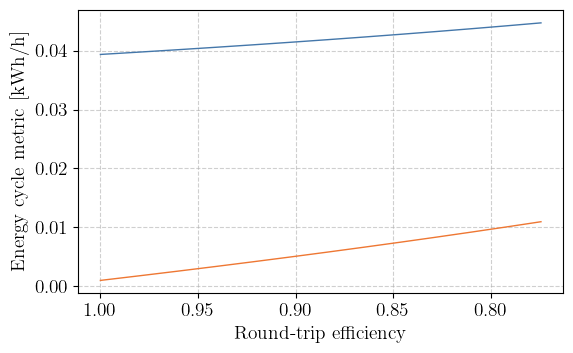

In [40]:
def plot_cycle(df):
    # Enable LaTeX-style text
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 14

    # Create the plot
    df['x-axis'] = df['charging_eff'] * df['discharging_eff']
    plt.figure(figsize=(7, 3.75))
    plt.plot(df['x-axis'], df['discharged_energy_per_hour'], 
             label=r'{Consumption}', color=color_da_node, linewidth=1)
    plt.plot(df['x-axis'], df['avg_power_loss_per_MW_fcr'], 
             label=r'{Consumption}', color=color_bess_node, linewidth=1)

    # Flip x-axis
    plt.gca().invert_xaxis()

    # Labels and title
    plt.ylabel(r'{Energy cycle metric [kWh/h]}', fontsize=14)
    plt.xlabel(r'{Round-trip efficiency}', fontsize=14)

    plt.gca().tick_params(axis='x', rotation=0)

    # Grid and legend
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    #plt.legend(
    #    loc='upper center',
    #    frameon=True,
    #    fontsize=11,
     #   fancybox=True,
    #    framealpha=0.9,
    #    edgecolor='gray'
    #)

    plt.tight_layout(rect=[0, 0, 0.85, 1])

    jpg_path = os.path.join(output_folder, "FCR_metric_1.jpg")
    plt.savefig(jpg_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)
    plt.show()

plot_cycle(df)

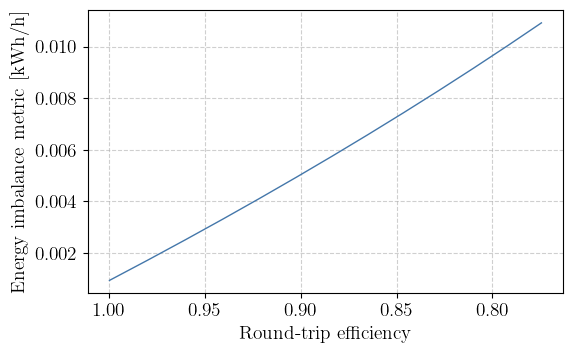

In [41]:
def plot_energy_loss(df):
    # Enable LaTeX-style text
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 14

    # Create the plot
    df['x-axis'] = df['charging_eff'] * df['discharging_eff']
    plt.figure(figsize=(7, 3.75))
    plt.plot(df['x-axis'], df['avg_power_loss_per_MW_fcr'], 
             label=r'{Consumption}', color=color_da_node, linewidth=1)

    # Flip x-axis
    plt.gca().invert_xaxis()

    # Labels and title
    plt.ylabel(r'{Energy imbalance metric [kWh/h]}', fontsize=14)
    plt.xlabel(r'{Round-trip efficiency}', fontsize=14)

    plt.gca().tick_params(axis='x', rotation=0)

    # Grid and legend
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    #plt.legend(
    #    loc='upper center',
    #    frameon=True,
    #    fontsize=11,
     #   fancybox=True,
    #    framealpha=0.9,
    #    edgecolor='gray'
    #)

    plt.tight_layout(rect=[0, 0, 0.85, 1])

    jpg_path = os.path.join(output_folder, "FCR_metric_2.jpg")
    plt.savefig(jpg_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)
    plt.show()

plot_energy_loss(df)

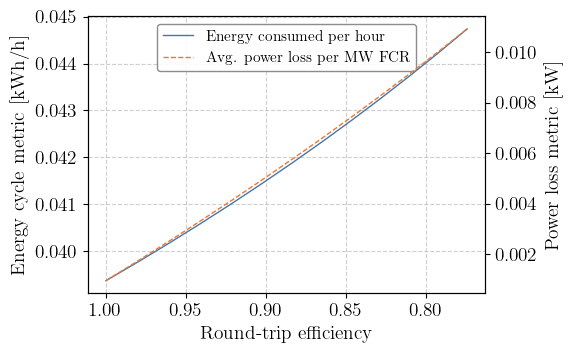

In [42]:
def plot_cycle_loss_combined(df):
    # Enable LaTeX-style text
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 14

    # Compute x-axis values
    df['x-axis'] = df['charging_eff'] * df['discharging_eff']

    fig, ax1 = plt.subplots(figsize=(7, 3.75))

    # --- Left Y-axis ---
    ln1 = ax1.plot(
        df['x-axis'], df['discharged_energy_per_hour'],
        label=r'Energy consumed per hour',
        color=color_da_node, linewidth=1
    )
    ax1.set_ylabel(r'Energy cycle metric [kWh/h]', fontsize=14)

    # Flip x-axis
    ax1.invert_xaxis()

    # X-label
    ax1.set_xlabel(r'Round-trip efficiency', fontsize=14)

    ax1.tick_params(axis='x', rotation=0)

    # --- Right Y-axis ---
    ax2 = ax1.twinx()
    ln2 = ax2.plot(
        df['x-axis'], df['avg_power_loss_per_MW_fcr'],
        label=r'Avg. power loss per MW FCR',
        color=color_bess_node, linewidth=1, linestyle='--'
    )
    ax2.set_ylabel(r'Power loss metric [kW]', fontsize=14)

    # --- Grid ---
    ax1.grid(True, which='both', linestyle='--', alpha=0.6)

    # --- Combined legend ---
    lines = ln1 + ln2
    labels = [l.get_label() for l in lines]
    ax1.legend(
        lines, labels,
        loc='upper center',
        frameon=True,
        fontsize=11,
        fancybox=True,
        framealpha=0.9,
        edgecolor='gray'
    )

    plt.tight_layout(rect=[0, 0, 0.85, 1])

    jpg_path = os.path.join(output_folder, "FCR_metric_1-2.jpg")
    plt.savefig(jpg_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)
    plt.show()

plot_cycle_loss_combined(df)

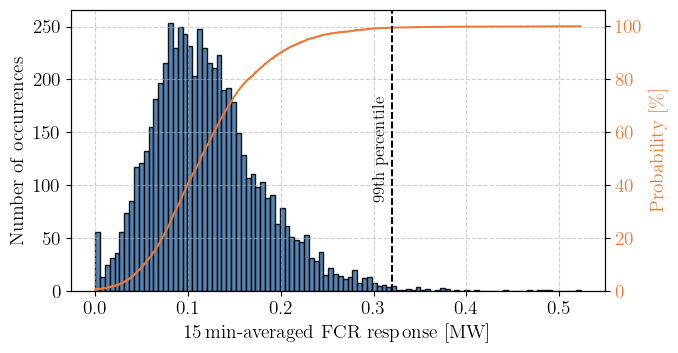

There is a 0.5% probability that 0.000 MW is activated in a 4h-block (15 min averaged).
Maximum FCR- Response: 0.5232 MW


In [74]:
def plot_charge_response_distribution(df_charging_events):
    # --- LaTeX formatting ---
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 14

    # --- Ensure correct 1D numeric array (important!) ---
    all_max_charge = np.asarray(df_charging_events, dtype=float).ravel()
    all_max_charge = np.clip(all_max_charge, 0, None)

    # --- Density (CDF) using EXACT original methodology ---
    sorted_vals = np.sort(all_max_charge)
    n = len(sorted_vals)
    density = np.arange(1, n + 1) / n * 100  # percent

    # --- Single figure with two y-axes ---
    fig, ax1 = plt.subplots(figsize=(7, 3.75))

    # ============================================================
    # 1) Histogram on left axis
    # ============================================================
    ax1.hist(all_max_charge, bins=100, edgecolor='black',
             color=color_da_node, alpha=0.9)

    ax1.set_xlabel(r'15\,min-averaged FCR response [MW]')
    ax1.set_ylabel(r'Number of occurrences')
    ax1.grid(True, linestyle='--', alpha=0.6)

    # ============================================================
    # 2) CDF step curve on right axis
    # ============================================================
    ax2 = ax1.twinx()
    ax2.step(sorted_vals, density, where='post',
             color=color_bess_node, linewidth=1.4)

    ax2.set_ylabel(r'Probability [\%]', color=color_bess_node)
    ax2.tick_params(axis='y', labelcolor=color_bess_node)
    ax2.set_ylim(0, 106.15)

    # ============================================================
    # 3) Vertical line at 0.32 MW + vertical label
    # ============================================================
    x_val = 0.32

    # Draw line on BOTH axes (for twin-axis consistency)
    ax1.axvline(x=x_val, color="black", linestyle="--", linewidth=1.3)
    ax2.axvline(x=x_val, color="black", linestyle="--", linewidth=1.3)

    # Add vertical text label next to the line
    ax1.text(
        x_val - 0.02,           # small horizontal offset to the right
        0.5,                     # midpoint vertically (in axes fraction)
        r'99th percentile',        # label
        rotation=90,             # vertical text
        va='center',             # vertical alignment
        ha='left',               # horizontal alignment (right of the line)
        fontsize=12,
        color='black',
        transform=ax1.get_xaxis_transform()  # align with x-axis scaling
    )

    plt.tight_layout()

    # Save figure
    save_path = os.path.join(output_folder, "FCR_metric_3.jpg")
    fig.savefig(save_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)

    plt.show()

    # --- Probability message ---
    probability = 0.5
    idx = np.argmax(density <= probability)
    if idx < len(sorted_vals):
        min_power = sorted_vals[idx]
        print(
            f"There is a {probability}% probability that {min_power:.3f} MW "
            f"is activated in a 4h-block (15 min averaged)."
        )
        print(f"Maximum FCR- Response: {np.max(all_max_charge):.4f} MW")
    else:
        print(f"No value found where density is {probability}% or higher.")


plot_charge_response_distribution(df_charging_events)

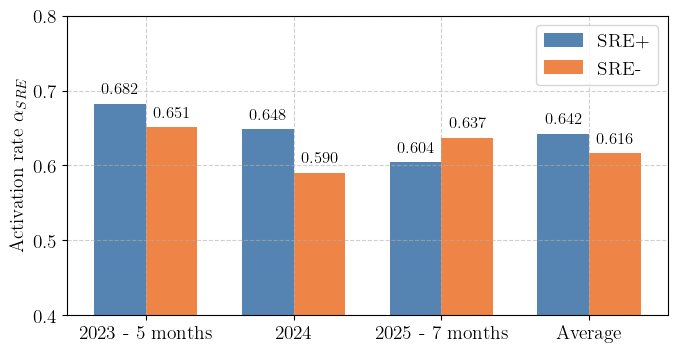

In [84]:
def plot_sre_activation():
    # --- LaTeX formatting ---
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 14

    # --- Data ---
    sre_pos_activation = [0.682, 0.648, 0.604, 0.642]
    tre_neg_activation = [0.651, 0.590, 0.637, 0.616]
    year = ['2023 - 5 months', 2024, '2025 - 7 months', 'Average']

    x = np.arange(len(year))
    width = 0.35  # bar width

    # --- Create figure ---
    fig, ax = plt.subplots(figsize=(7, 3.75))

    # --- Bars ---
    bars_sre = ax.bar(x - width/2, sre_pos_activation, width, 
                      label=r'SRE+', color=color_da_node, alpha=0.9)
    bars_tre = ax.bar(x + width/2, tre_neg_activation, width, 
                      label=r'SRE-', color=color_bess_node, alpha=0.9)

    # --- Axis labels ---
    #ax.set_xlabel(r'Year')
    ax.set_ylabel(r'Activation rate $\alpha_{SRE}$')
    ax.set_xticks(x)
    ax.set_xticklabels(year)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_ylim(0.4, 0.8)

    # --- Add numeric values on top ---
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + 0.01,                             # vertical offset
                rf'{height:.3f}',                          # number format
                ha='center', va='bottom', fontsize=12
            )

    add_labels(bars_sre)
    add_labels(bars_tre)

    ax.legend()

    plt.tight_layout()

    # Save
    save_path = os.path.join(output_folder, "SRE_activation.jpg")
    fig.savefig(save_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)

    plt.show()

plot_sre_activation()